In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets


In [4]:
iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [5]:
#Though head doesn't work, the instructor was using a print statement
#to use the DESCR function.  That isn't necessary now and a simple.DESCR
#works fine.
print(iris.DESCR)
#Using the print method does FORMAT the function, making it easier to read.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
from sklearn.svm import SVC

In [7]:
model = SVC()

In [8]:
#from sklearn.cross_validation import train_test_split

from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.4)

In [10]:
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
from sklearn import metrics

In [12]:
predicted = model.predict(X_test)

expected = Y_test

In [13]:
print(metrics.accuracy_score(expected, predicted))

0.95


In [14]:
from sklearn import svm


In [15]:
X = iris.data[:,:2]

Y = iris.target

In [16]:
C = 1.0

In [17]:
svc = svm.SVC(kernel='linear', C=C).fit(X,Y)

In [18]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X,Y)

In [19]:
poly_svc = svm.SVC(kernel='poly',degree=3, C=C).fit(X,Y)

In [23]:
lin_svc = svm.LinearSVC(C=C,max_iter=5000).fit(X,Y)

In [25]:
#Below is the mesh setup for the visualizations from the sklearn library
h = 0.02
#Above is step size and below is min and max
x_min = X[:,0].min() -1
x_max = X[:,0].max() +1


In [26]:
y_min = X[:,1].min() -1
y_max = X[:,1].max() +1

In [29]:
xx,yy = np.meshgrid(np.arange(x_min, x_max,h), np.arange(y_min, y_max,h))

In [30]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

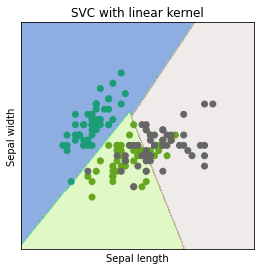

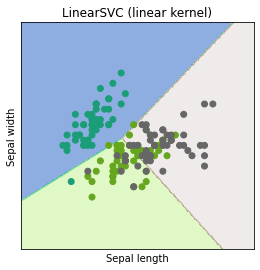

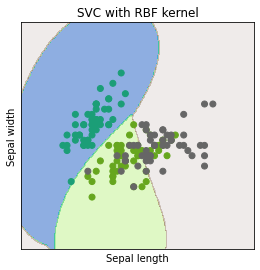

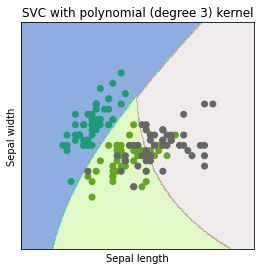

In [37]:
# Use enumerate for a count
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(10,10))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2, 2, i+1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    


plt.show()